In [1]:
%matplotlib inline

from operator import itemgetter
import networkx as nx

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
from io import StringIO
from IPython.display import SVG, display

In [2]:
sns.set_context("poster")
sns.set_style("ticks")

In [3]:
G = nx.krackhardt_kite_graph()

In [4]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [5]:
G.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 4), (1, 6), (2, 3), (2, 5), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7), (7, 8), (8, 9)])

In [6]:
G.degree()

DegreeView({0: 4, 1: 4, 2: 3, 3: 6, 4: 3, 5: 5, 6: 5, 7: 3, 8: 2, 9: 1})

In [7]:
for item in G.degree:
    print(item[0], item[1])

0 4
1 4
2 3
3 6
4 3
5 5
6 5
7 3
8 2
9 1


In [8]:
df_t = pd.DataFrame([item for item in G.degree()])

In [9]:
df_t.columns = ["node", "degree"]
df_t

,node,degree
0,0,4
1,1,4
2,2,3
3,3,6
4,4,3
5,5,5
6,6,5
7,7,3
8,8,2
9,9,1


In [10]:
nx.__version__

'2.1'

In [11]:
G.nodes[7]["name"] = "Heather"

In [12]:
G.nodes(data=True)

NodeDataView({0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {'name': 'Heather'}, 8: {}, 9: {}})

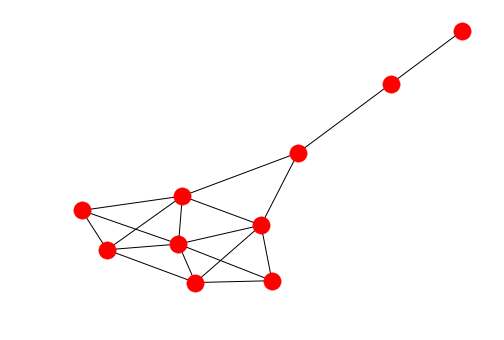

In [13]:
nx.draw(G)

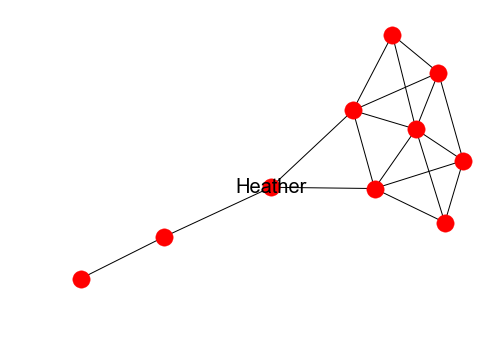

In [14]:
nx.draw(G, labels={
    7: "Heather"
}, font_size=20)

In [15]:
degree_dict = G.degree
node_degrees = [
    degree_dict[n]*100
    for n in G.nodes
]
node_degrees

[400, 400, 300, 600, 300, 500, 500, 300, 200, 100]

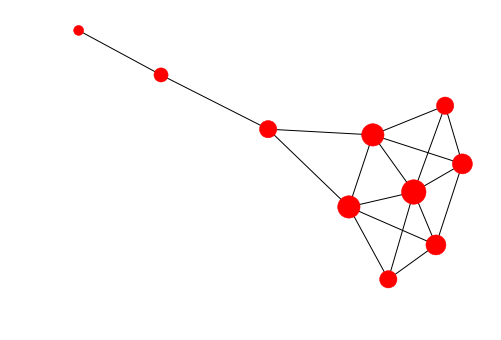

In [16]:
nx.draw(G, node_size=node_degrees)

In [17]:
from utilities import dict_to_values

In [18]:
node_degrees = dict_to_values(G, G.degree)
node_degrees

[4, 4, 3, 6, 3, 5, 5, 3, 2, 1]

In [19]:
factor = 100
node_degrees = [n*factor for n in node_degrees]
node_degrees

[400, 400, 300, 600, 300, 500, 500, 300, 200, 100]

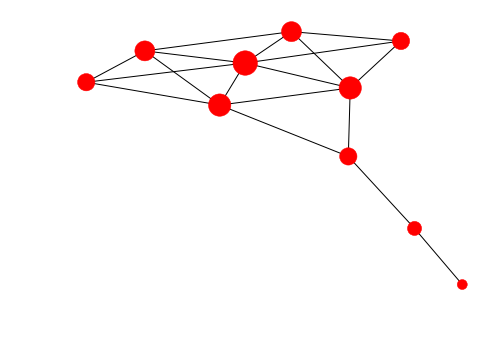

In [20]:
nx.draw(G, node_size=node_degrees)

In [21]:
from utilities import plot_network

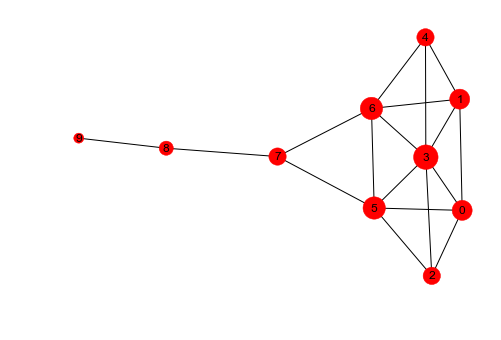

In [22]:
plot_network(G, G.degree, factor=100)

In [23]:
node_degrees = dict_to_values(G, G.degree)
node_degrees

[4, 4, 3, 6, 3, 5, 5, 3, 2, 1]

In [24]:
max(node_degrees)

6

Text(0,0.5,'Frequency')

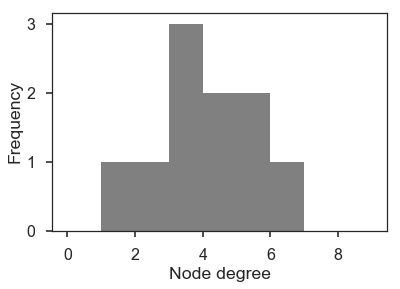

In [25]:
node_degrees = dict_to_values(G, G.degree)
plt.hist(node_degrees, bins=range(10), facecolor="0.5")
plt.xlabel("Node degree")
plt.ylabel("Frequency")

In [26]:
nx.degree_centrality(G)

{0: 0.4444444444444444,
 1: 0.4444444444444444,
 2: 0.3333333333333333,
 3: 0.6666666666666666,
 4: 0.3333333333333333,
 5: 0.5555555555555556,
 6: 0.5555555555555556,
 7: 0.3333333333333333,
 8: 0.2222222222222222,
 9: 0.1111111111111111}

Text(0,0.5,'Frequency')

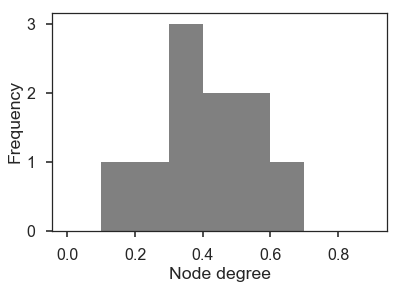

In [27]:
node_degrees = dict_to_values(G, nx.degree_centrality(G))
plt.hist(node_degrees, bins=np.arange(0,1,0.1), facecolor="0.5")
plt.xlabel("Node degree")
plt.ylabel("Frequency")

In [28]:
nx.betweenness_centrality(G)

{0: 0.023148148148148143,
 1: 0.023148148148148143,
 2: 0.0,
 3: 0.10185185185185183,
 4: 0.0,
 5: 0.23148148148148148,
 6: 0.23148148148148148,
 7: 0.38888888888888884,
 8: 0.2222222222222222,
 9: 0.0}

In [29]:
nx.eigenvector_centrality(G)

{0: 0.35220898139203594,
 1: 0.35220898139203594,
 2: 0.2858347353163241,
 3: 0.4810204881221006,
 4: 0.2858347353163241,
 5: 0.3976910106255469,
 6: 0.3976910106255469,
 7: 0.19586185175360382,
 8: 0.04807477501420294,
 9: 0.011164058575824238}

In [30]:
nx.closeness_centrality(G)

{0: 0.5294117647058824,
 1: 0.5294117647058824,
 2: 0.5,
 3: 0.6,
 4: 0.5,
 5: 0.6428571428571429,
 6: 0.6428571428571429,
 7: 0.6,
 8: 0.42857142857142855,
 9: 0.3103448275862069}

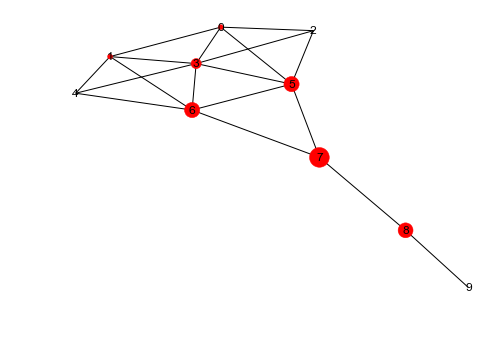

In [31]:
plot_network(G, nx.betweenness_centrality(G), factor=1000)

In [32]:
nx.clustering(G)

{0: 0.6666666666666666,
 1: 0.6666666666666666,
 2: 1.0,
 3: 0.5333333333333333,
 4: 1.0,
 5: 0.5,
 6: 0.5,
 7: 0.3333333333333333,
 8: 0,
 9: 0}

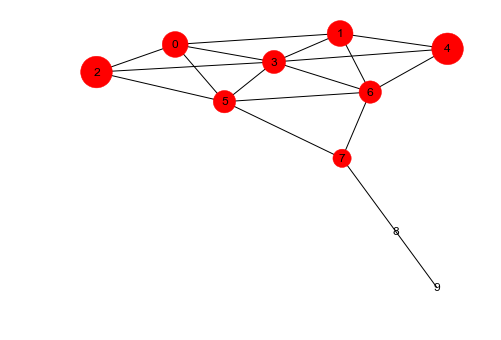

In [33]:
plot_network(G, nx.clustering(G), factor=1000)

In [34]:
np.mean(dict_to_values(G, nx.clustering(G)))

0.5199999999999999

In [35]:
from utilities import get_all_node_metrics

In [36]:
df_t = get_all_node_metrics(G)

In [37]:
df_t

,degree,betweenness,closeness,eigenvector,clustering
0,0.444444,0.023148,0.529412,0.352209,0.666667
1,0.444444,0.023148,0.529412,0.352209,0.666667
2,0.333333,0.000000,0.500000,0.285835,1.000000
3,0.666667,0.101852,0.600000,0.481020,0.533333
4,0.333333,0.000000,0.500000,0.285835,1.000000
5,0.555556,0.231481,0.642857,0.397691,0.500000
6,0.555556,0.231481,0.642857,0.397691,0.500000
7,0.333333,0.388889,0.600000,0.195862,0.333333
8,0.222222,0.222222,0.428571,0.048075,0.000000
9,0.111111,0.000000,0.310345,0.011164,0.000000


In [38]:
df_t.sort_values("betweenness", ascending=False)

,degree,betweenness,closeness,eigenvector,clustering
7,0.333333,0.388889,0.600000,0.195862,0.333333
5,0.555556,0.231481,0.642857,0.397691,0.500000
6,0.555556,0.231481,0.642857,0.397691,0.500000
8,0.222222,0.222222,0.428571,0.048075,0.000000
3,0.666667,0.101852,0.600000,0.481020,0.533333
0,0.444444,0.023148,0.529412,0.352209,0.666667
1,0.444444,0.023148,0.529412,0.352209,0.666667
2,0.333333,0.000000,0.500000,0.285835,1.000000
4,0.333333,0.000000,0.500000,0.285835,1.000000
9,0.111111,0.000000,0.310345,0.011164,0.000000


In [39]:
nx.average_shortest_path_length(G)

1.9777777777777779

In [40]:
nx.density(G)

0.4

## Florentine family networks

In [41]:
from utilities import read_UCINET_matrix

In [42]:
G = read_UCINET_matrix("../../data/padgett.xlsx", "PADGM")

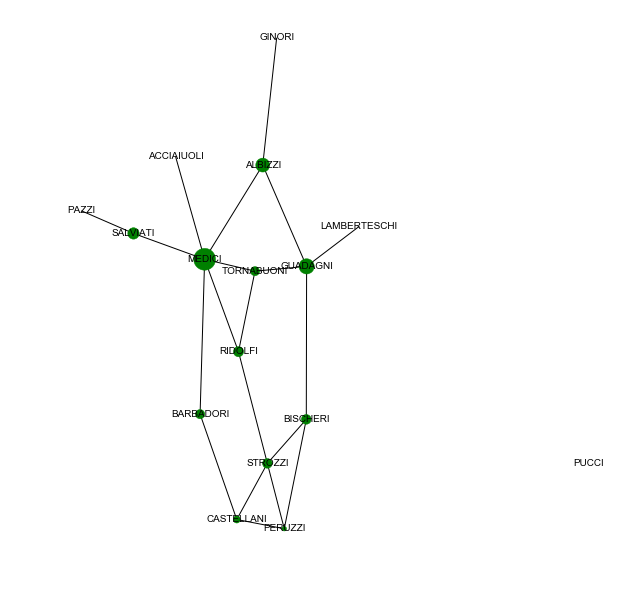

In [43]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
plot_network(
    G,
    nx.betweenness_centrality(G, normalized=False),
    factor=10,
    node_color="g",
    font_size=10,
)

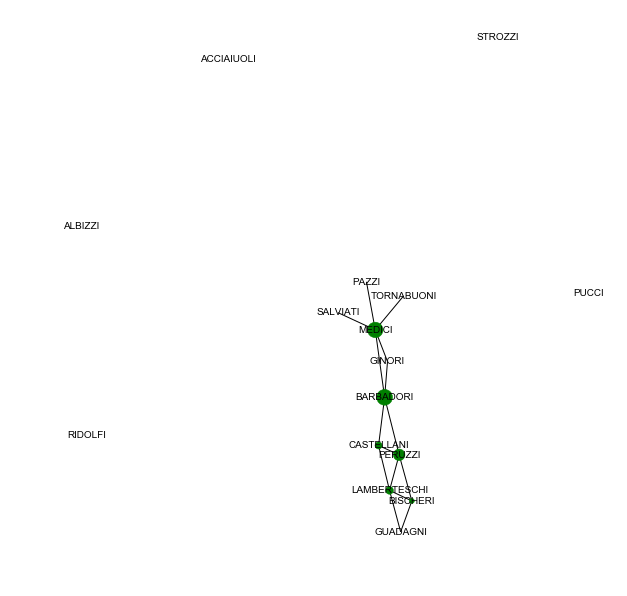

In [44]:
G = read_UCINET_matrix("../../data/padgett.xlsx", "PADGB")
fig, ax = plt.subplots(1,1, figsize=(10,10))
plot_network(
    G,
    nx.betweenness_centrality(G, normalized=False),
    factor=10,
    node_color="g",
    font_size=10,
)

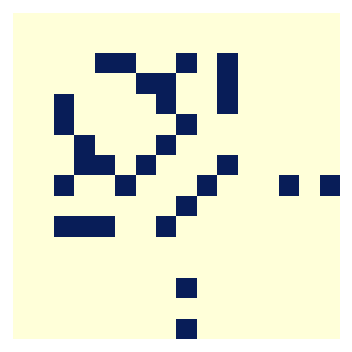

In [45]:
from nxviz import MatrixPlot

m = MatrixPlot(G)
m.draw()
plt.show()

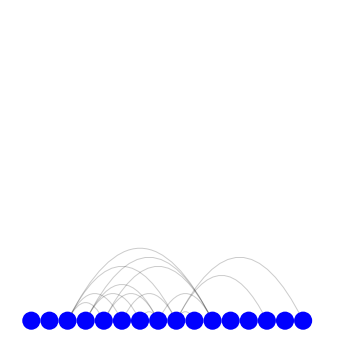

In [46]:
from nxviz import ArcPlot

a = ArcPlot(G)
a.draw()

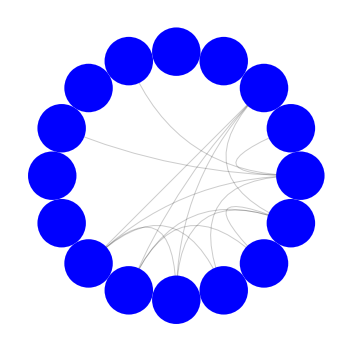

In [47]:
from nxviz import CircosPlot

c = CircosPlot(G)
c.draw()